# Comparisons between Oregon Coastal Endurance Surface Moorings ADCP Data - a Data Quality Report
### This includes comparisons between the telemetered and downloaded datasets
### And comparisons between different ADCPs within the array




## Review Summary
This report summarizes a comparison between telemetered and recovered instrument data for a period in the 4th quarter of 2016. This report is not necessarily a comprehensive review of the instruments and quality of the data available but instead compares the quality of data retrieved immediately and that available following a cruise to collect the data from the array.

![Inshore Data Availability](map.png)


![Coastal Endurance Shelf Surface Mooring Schematic](http://oceanobservatories.org/wp-content/uploads/2015/09/CE_WA_Inshore_Surface_Mooring-173x350.png)


**I examined the data avilability for the three ADCPs to determine a period of overlap between them.**

* Inshore
    * CE01ISSM-MFD35-04-ADCPTM000

![Inshore Data Availability](Inshore.JPG)
    
    
* Shelf
    * CE02SHSM-RID26-01-ADCPTA000
    
![Shelf Data Availability](Shelf.JPG)

* Offshore
    * CE04OSSM-RID26-01-ADCPTC000

![Offshore Data Availability](Offshore.JPG)

There is good overlap from June 2015 through September 2017. But, I chose the period from '2016-09-01T00:01:01.000Z' through '2016-12-01T00:01:01.000Z' because there is also good coverage for the single point velocimeters during this time. I had initially alsao planned on comparing data from the two instrument types.

# initialize

In [13]:
import requests
import time
import matplotlib.pyplot as plt
import numpy as np
import re
import os
import xarray as xr
import scipy.stats.stats as stats

username = ''
token = ''

subsite=[]
node=[]
sensor=[]
method=[]
stream=[]

# feed in the site information

In [14]:
# Coastal Endurance Inshore Surface Mooring
# CE01ISSM-MFD35-04-ADCPTM000
subsite.append('CE01ISSM')
node.append('MFD35')
sensor.append('04-ADCPTM000')
method.append('recovered_inst')
stream.append('adcp_velocity_earth')

In [15]:
# Coastal Endurance Shelf Surface Mooring
# CE02SHSM-RID26-01-ADCPTA000
subsite.append('CE02SHSM')
node.append('RID26')
sensor.append('01-ADCPTA000')
method.append('recovered_inst')
stream.append('adcp_velocity_earth')

In [16]:
# Coastal Endurance Offshore Surface Mooring
# CE04OSSM-RID26-01-ADCPTC000
subsite.append('CE04OSSM')
node.append('RID26')
sensor.append('01-ADCPTC000')
method.append('recovered_inst')
stream.append('adcp_velocity_earth')

In [17]:
beginDT= '2016-09-01T00:01:01.000Z'
endDT=   '2016-12-01T00:01:01.000Z'

# Request both **'recovered_inst'** and **'telemetered'** the data. 
#### Note: Data request lines are commented out to prevent accidental resubmission when running through the entire notebook quickly.

In [18]:
# base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/'

# params = {
#     'beginDT':beginDT,
#     'endDT':endDT,   
# }
# data_request_url=[]
# data_request_url_telem=[]
# r=[]
# r_telem=[]
# data=[]
# data_telem=[]

# for i in range(0,len(subsite)):

#     method='recovered_inst'
#     data_request_url.append('/'.join((base_url,subsite[i],node[i],sensor[i],method,stream[i])))
#     r.append(requests.get(data_request_url[i], params=params, auth=(username, token)))
#     data.append(r[i].json())
    
#     method='telemetered'
#     data_request_url_telem.append('/'.join((base_url,subsite[i],node[i],sensor[i],method,stream[i])))
#     r_telem.append(requests.get(data_request_url_telem[i], params=params, auth=(username, token)))
#     data_telem.append(r_telem[i].json())
    


In [19]:
#save it
# np.save('ADCP_Data_Instr',data)
# np.save('ADCP_Data_Telem',data_telem)

In [20]:
data=[{'requestUUID': 'f1cbd117-95bc-4f72-a8e2-bdb17b89cc28',
  'outputURL': 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124522-CE01ISSM-MFD35-04-ADCPTM000-recovered_inst-adcp_velocity_earth/catalog.html',
  'allURLs': ['https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124522-CE01ISSM-MFD35-04-ADCPTM000-recovered_inst-adcp_velocity_earth/catalog.html',
   'https://opendap.oceanobservatories.org/async_results/cjrusson@gmail.com/20180720T124522-CE01ISSM-MFD35-04-ADCPTM000-recovered_inst-adcp_velocity_earth'],
  'sizeCalculation': 7348174,
  'timeCalculation': 60,
  'numberOfSubJobs': 92},
 {'requestUUID': 'a7badbbb-aa56-41c2-81e6-0bdf0c5440a2',
  'outputURL': 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124538-CE02SHSM-RID26-01-ADCPTA000-recovered_inst-adcp_velocity_earth/catalog.html',
  'allURLs': ['https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124538-CE02SHSM-RID26-01-ADCPTA000-recovered_inst-adcp_velocity_earth/catalog.html',
   'https://opendap.oceanobservatories.org/async_results/cjrusson@gmail.com/20180720T124538-CE02SHSM-RID26-01-ADCPTA000-recovered_inst-adcp_velocity_earth'],
  'sizeCalculation': 14703552,
  'timeCalculation': 60,
  'numberOfSubJobs': 92},
 {'requestUUID': '2e18aec6-f2bf-4e2a-8642-970f0a796be3',
  'outputURL': 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124558-CE04OSSM-RID26-01-ADCPTC000-recovered_inst-adcp_velocity_earth/catalog.html',
  'allURLs': ['https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124558-CE04OSSM-RID26-01-ADCPTC000-recovered_inst-adcp_velocity_earth/catalog.html',
   'https://opendap.oceanobservatories.org/async_results/cjrusson@gmail.com/20180720T124558-CE04OSSM-RID26-01-ADCPTC000-recovered_inst-adcp_velocity_earth'],
  'sizeCalculation': 14011959,
  'timeCalculation': 60,
  'numberOfSubJobs': 92}]

In [21]:
data_telem=[{'requestUUID': 'b34d88a3-ea87-41bc-a65d-23d9da4e231e',
  'outputURL': 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124530-CE01ISSM-MFD35-04-ADCPTM000-telemetered-adcp_velocity_earth/catalog.html',
  'allURLs': ['https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124530-CE01ISSM-MFD35-04-ADCPTM000-telemetered-adcp_velocity_earth/catalog.html',
   'https://opendap.oceanobservatories.org/async_results/cjrusson@gmail.com/20180720T124530-CE01ISSM-MFD35-04-ADCPTM000-telemetered-adcp_velocity_earth'],
  'sizeCalculation': 1008573,
  'timeCalculation': 60,
  'numberOfSubJobs': 92},
 {'requestUUID': 'abab0870-f418-4c81-8ce1-a751d863c3bf',
  'outputURL': 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124548-CE02SHSM-RID26-01-ADCPTA000-telemetered-adcp_velocity_earth/catalog.html',
  'allURLs': ['https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124548-CE02SHSM-RID26-01-ADCPTA000-telemetered-adcp_velocity_earth/catalog.html',
   'https://opendap.oceanobservatories.org/async_results/cjrusson@gmail.com/20180720T124548-CE02SHSM-RID26-01-ADCPTA000-telemetered-adcp_velocity_earth'],
  'sizeCalculation': 12823284,
  'timeCalculation': 60,
  'numberOfSubJobs': 92},
 {'requestUUID': '70c25f20-70a6-44c8-bb05-e137ebdc7ad7',
  'outputURL': 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124606-CE04OSSM-RID26-01-ADCPTC000-telemetered-adcp_velocity_earth/catalog.html',
  'allURLs': ['https://opendap.oceanobservatories.org/thredds/catalog/ooi/cjrusson@gmail.com/20180720T124606-CE04OSSM-RID26-01-ADCPTC000-telemetered-adcp_velocity_earth/catalog.html',
   'https://opendap.oceanobservatories.org/async_results/cjrusson@gmail.com/20180720T124606-CE04OSSM-RID26-01-ADCPTC000-telemetered-adcp_velocity_earth'],
  'sizeCalculation': 12625892,
  'timeCalculation': 60,
  'numberOfSubJobs': 92}]

## Load and Plot the Data

Parse the thredds server to get a list of all NetCDF files. Here, copy and paste the url from *'data['allURLs'][0]'* to avoid having to request the data every time you want to plot.

In [22]:
datasets=[]

for i in range(0,len(data)):
    url = data[i]['allURLs'][0]

    tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
    datasets.append(requests.get(url).text)
    urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets[i])
    x = re.findall(r'(ooi/.*?.nc)', datasets[i])
    for j in x:
        if j.endswith('.nc') == False:
            x.remove(j)
    for j in x:
        try:
            float(j[-4])
        except:
            x.remove(j)
    datasets[i] = [os.path.join(tds_url, j) for j in x]

In [23]:
datasets_telem=[]

for i in range(0,len(data_telem)):
    url = data_telem[i]['allURLs'][0]

    tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
    datasets_telem.append(requests.get(url).text)
    urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets_telem[i])
    x = re.findall(r'(ooi/.*?.nc)', datasets_telem[i])
    for j in x:
        if j.endswith('.nc') == False:
            x.remove(j)
    for j in x:
        try:
            float(j[-4])
        except:
            x.remove(j)
    datasets_telem[i] = [os.path.join(tds_url, j) for j in x]

Load the list of NetCDF files into xarray. Note that this datasets has two dimensions, time and bin. Some variables are dimensioned along just time, others along both time and bin number.

In [24]:
ds=[]

for i in range(0,len(datasets)):
    ds.append(xr.open_mfdataset(datasets[i]))
    ds[i] = ds[i].swap_dims({'obs': 'time'})
    ds[i] = ds[i].sortby('time');
    ds[i] = ds[i].chunk({'time': 100})
#ds

In [25]:
ds_telem=[]

for i in range(0,len(datasets_telem)):
    ds_telem.append(xr.open_mfdataset(datasets_telem[i]))
    ds_telem[i] = ds_telem[i].swap_dims({'obs': 'time'})
    ds_telem[i] = ds_telem[i].sortby('time');
    ds_telem[i] = ds_telem[i].chunk({'time': 100})
# ds_telem

Extract the bin depths, east, north and west values along the time dimensions. Note the .T for two dimensional variables.

In [26]:
time=[]
bin_depths=[]
east=[]
north=[]
up=[]
for i in range(0,len(ds)):
    time.append(ds[i]['time'].data)
    bin_depths.append(ds[i]['bin_depths'].data.T)
    east.append(ds[i]['water_velocity_east'].data.T)
    north.append(ds[i]['water_velocity_north'].data.T)
    up.append(ds[i]['water_velocity_up'].data.T)

In [27]:
time_tel=[]
bin_depths_tel=[]
east_tel=[]
north_tel=[]
up_tel=[]
for i in range(0,len(ds_telem)):
    time_tel.append(ds_telem[i]['time'].data)
    bin_depths_tel.append(ds_telem[i]['bin_depths'].data.T)
    east_tel.append(ds_telem[i]['water_velocity_east'].data.T)
    north_tel.append(ds_telem[i]['water_velocity_north'].data.T)
    up_tel.append(ds_telem[i]['water_velocity_up'].data.T)

Next we will plot the data.

To screen out surface noise velocities we will set the colorbar limit to the 90th percentile of the data. *Note: np.nanpercentile() is only valid if the data are normally-distributed.*

In [28]:
u_v_w=[]

for i in range(0,len(ds)):
    lim_east=float("%2.2f" % np.nanpercentile(east[i], 90))
    lim_north=float("%2.2f" % np.nanpercentile(north[i], 90))
    lim_up=float("%2.2f" % np.nanpercentile(up[i], 90))
    u_v_w.append(max([lim_east, lim_north, lim_up]))
    
u_v_w_tel=[]

for i in range(0,len(ds_telem)):
    lim_east=float("%2.2f" % np.nanpercentile(east_tel[i], 90))
    lim_north=float("%2.2f" % np.nanpercentile(north_tel[i], 90))
    lim_up=float("%2.2f" % np.nanpercentile(up_tel[i], 90))
    u_v_w_tel.append(max([lim_east, lim_north, lim_up]))
    
        

And plot.

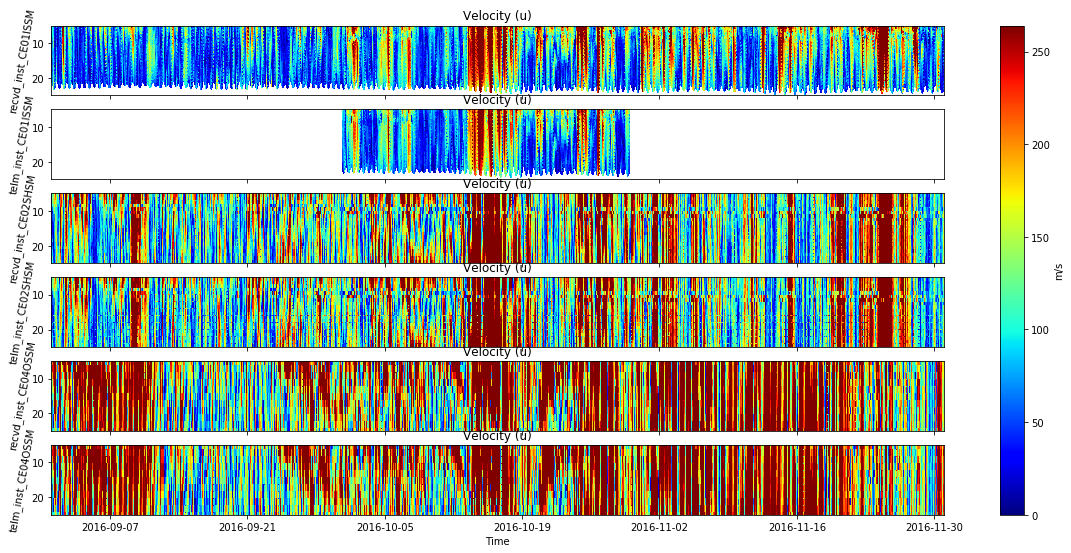

In [37]:
numPlots=len(ds)
p=[]
axes=[]

plt.close()
fig, axes = plt.subplots(numPlots*2, sharex=True)
fig.set_size_inches(20, 9)

ymin=5
ymax=25

for i in range(0,numPlots):
    plotNum=(i*2)
    hz_vel=(east[i]**2+north[i]**2)**.5
    p.append(axes[plotNum].pcolormesh(time[i], bin_depths[i], hz_vel, cmap='jet',vmin=0,vmax=u_v_w[i]))
    axes[plotNum].set_ylim(ymin,ymax)
    axes[plotNum].set_title('Velocity (u)')
    axes[plotNum].invert_yaxis()
    temp=axes[plotNum].set_ylabel('recvd_inst_' + subsite[i])
    temp.set_rotation(80)

    plotNum=(i*2+1)
    hz_vel_tel=(east_tel[i]**2+north_tel[i]**2)**.5
    p.append(axes[plotNum].pcolormesh(time_tel[i], bin_depths_tel[i], hz_vel_tel, cmap='jet',vmin=0,vmax=u_v_w_tel[i]))
    axes[plotNum].set_ylim(ymin,ymax)
    axes[plotNum].set_title('Velocity (u)')
    axes[plotNum].invert_yaxis()
    temp=axes[plotNum].set_ylabel('telm_inst_' + subsite[i])
    temp.set_rotation(80)
    
axes[-1].set_xlabel('Time')
fig.colorbar(p[-1],ax=axes.ravel().tolist(), label='m/s')

plt.show()

**Visually, these^^ look similar.** But can we better quantify how similar?

Maybe by looking at some line plots?


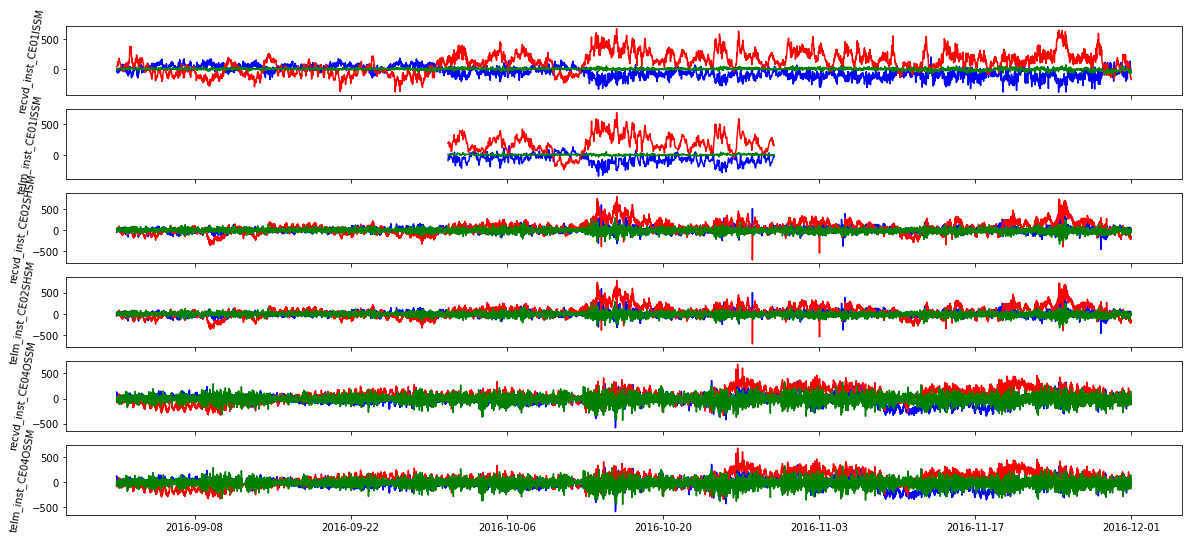

In [40]:
plt.close()
fig, axes = plt.subplots(numPlots*2, sharex=True)
fig.set_size_inches(20, 9)

ymin=-10
ymax=100

for i in range(0,numPlots):
    plotNum=(i*2)
    p.append(axes[plotNum].plot(time[i],np.nanmean(east[i],0),'-b'))
    p.append(axes[plotNum].plot(time[i],np.nanmean(north[i],0),'-r'))
    p.append(axes[plotNum].plot(time[i],np.nanmean(up[i],0),'-g'))
    temp=axes[plotNum].set_ylabel('recvd_inst_' + subsite[i])
    temp.set_rotation(80)
    
    plotNum=(i*2+1)
    p.append(axes[plotNum].plot(time_tel[i],np.nanmean(east_tel[i],0),'-b'))
    p.append(axes[plotNum].plot(time_tel[i],np.nanmean(north_tel[i],0),'-r'))
    p.append(axes[plotNum].plot(time_tel[i],np.nanmean(up_tel[i],0),'-g'))
    temp=axes[plotNum].set_ylabel('telm_inst_' + subsite[i])
    temp.set_rotation(80)

But a straight compare is not possible, because the sampling intervals are different...

So we'll SLICE to preserve only only overlapping times.

In [41]:
timeMin='2016-10-01T00:00:00.000'
timeMax='2016-10-29T00:00:00.000'

ds2_instr=[]
ds2_telem=[]

for i in range(0,3):
    ds2_instr.append(ds[i].sel(time=slice(timeMin, timeMax)))
    ds2_telem.append(ds_telem[i].sel(time=slice(timeMin, timeMax)))

# print(ds2_instr[0]['time'].min(),ds2_telem[0]['time'].min())
# print(ds2_instr[0]['time'].max(),ds2_telem[0]['time'].max())    
    
itime=[]
ibin_depths=[]
ieast=[]
inorth=[]
iup=[]

ttime=[]
tbin_depths=[]
teast=[]
tnorth=[]
tup=[]

for i in range(0,len(ds2_instr)):
    itime.append(ds2_instr[i]['time'].data)
    ibin_depths.append(ds2_instr[i]['bin_depths'].data.T)
    ieast.append(ds2_instr[i]['water_velocity_east'].data.T)
    inorth.append(ds2_instr[i]['water_velocity_north'].data.T)
    iup.append(ds2_instr[i]['water_velocity_up'].data.T)
    
    ttime.append(ds2_telem[i]['time'].data)
    tbin_depths.append(ds2_telem[i]['bin_depths'].data.T)
    teast.append(ds2_telem[i]['water_velocity_east'].data.T)
    tnorth.append(ds2_telem[i]['water_velocity_north'].data.T)
    tup.append(ds2_telem[i]['water_velocity_up'].data.T)

In [43]:
#define functions to find nearest value or index
def find_nearest_val(array, value):
    return min(array, key=lambda x: abs(x - value))

def find_nearest_ind(array, value):
    time_diff = np.abs([date - value for date in array])
    return time_diff.argmin(0)

trim instrument-derived array to downsample and match only timesteps of the telemetered array

In [44]:
trim_ind=[]

itime_trim=[]
ibin_depths_trim=[]
ieast_trim=[]
inorth_trim=[]
iup_trim=[]

for i in range(0,len(ttime)):
#     find nearest value of ttime(i) in itime
    trim_ind.append([])
    for j in range(0,len(ttime[i])):
        trim_ind[i].append(find_nearest_ind(itime[i],ttime[i][j]))

    itime_trim.append(itime[i][trim_ind[i]])
    ibin_depths_trim.append(ibin_depths[i][:,trim_ind[i]])
    ieast_trim.append(ieast[i][:,trim_ind[i]])
    inorth_trim.append(inorth[i][:,trim_ind[i]])
    iup_trim.append(iup[i][:,trim_ind[i]])

Plot

/opt/conda/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


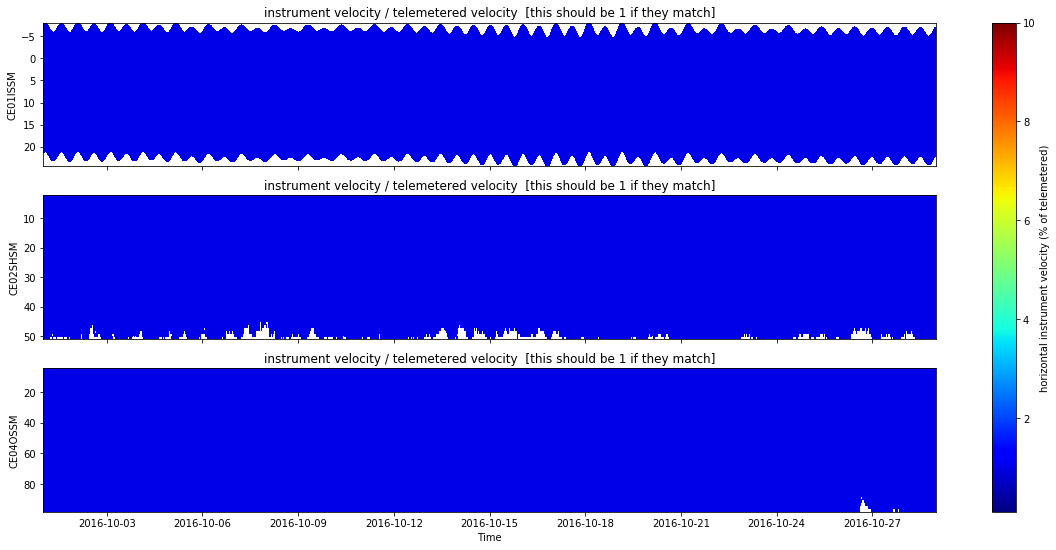

In [46]:
numPlots=len(ds)
p=[]
axes=[]

plt.close()
fig, axes = plt.subplots(numPlots, sharex=True)
fig.set_size_inches(20, 9)

ymin=5
ymax=25

for i in range(0,numPlots):
    #divide the instrument by the telemetered dataset to see the % difference and plot.
    hz_vel_i=(ieast_trim[i]**2+inorth_trim[i]**2)**.5
    hz_vel_t=(teast[i]**2+tnorth[i]**2)**.5
    divisor=(hz_vel_i/hz_vel_t)
    plotNum=(i)
    p.append(axes[plotNum].pcolormesh(itime_trim[i], ibin_depths_trim[i], divisor, vmin=0.1,vmax=10, cmap='jet'))
#     axes[plotNum].set_ylim(ymin,ymax)
    axes[plotNum].set_title('instrument velocity / telemetered velocity  [this should be 1 if they match]')
    axes[plotNum].invert_yaxis()
    axes[plotNum].set_ylabel(subsite[i])
    
axes[-1].set_xlabel('Time')
fig.colorbar(p[-1],ax=axes.ravel().tolist(), label='horizontal instrument velocity (% of telemetered)')

plt.show()

** these match well, so no visual issues **

So let's compare the U-components of velocity betrween the the three sensors.

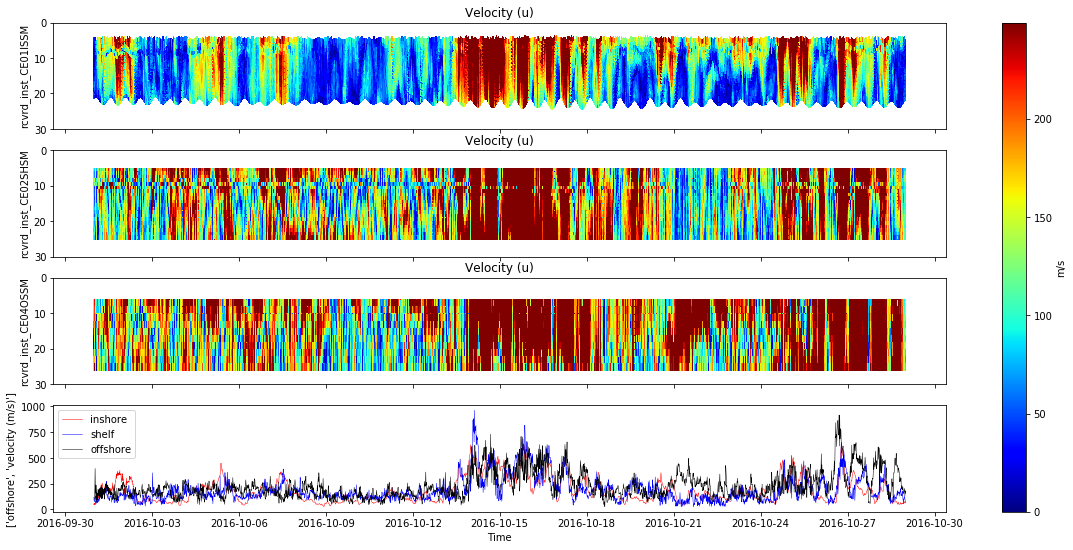

In [50]:
numPlots=len(ds)
p=[]
axes=[]

plt.close()
fig, axes = plt.subplots(numPlots+1, sharex=True)
fig.set_size_inches(20, 9)

ymin=5
ymax=25

labels=['inshore','shelf','offshore']
markers=['-r','-b','-k']

for i in range(0,numPlots):
    plotNum=(i)
    hz_vel=(ieast[i]**2+inorth[i]**2)**.5
    hz_vel[ibin_depths[i]<ymin]=np.nan
    hz_vel[ibin_depths[i]>ymax]=np.nan

    p.append(axes[i].pcolormesh(itime[i], ibin_depths[i], hz_vel, cmap='jet',vmin=0,vmax=u_v_w[i]))
    axes[i].set_ylim(0,30)
    axes[i].set_title('Velocity (u)')
    axes[i].invert_yaxis()
    axes[i].set_ylabel('rcvrd_inst_' + subsite[i])

    p.append(axes[numPlots].plot(itime[i],np.nanmean(hz_vel,0),markers[i],linewidth=0.5,label=labels[i]))
    axes[numPlots].set_ylabel([labels[i],'velocity (m/s)'])
plt.legend()
axes[-1].set_xlabel('Time')
fig.colorbar(p[i],ax=axes.ravel().tolist(), label='m/s')

0
1
2


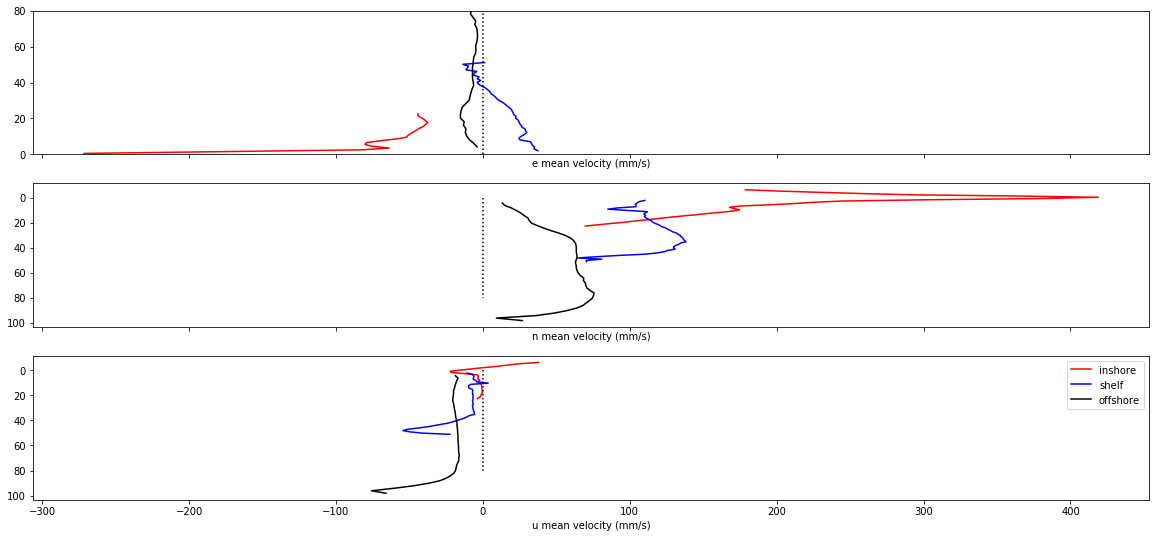

In [66]:
numPlots=len(ds)
p=[]
axes=[]

plt.close()
fig, axes = plt.subplots(numPlots, sharex=True)
fig.set_size_inches(20, 9)

labels=['inshore','shelf','offshore']
markers=['-r','-b','-k']

ymin=0
ymax=80

# commented out for to prevent unnecessary rerun
e=[]
n=[]
u=[]

for i in range(0,numPlots):

    e.append(np.nanmean(matchingEast[i],1))
    n.append(np.nanmean(matchingNorth[i],1))
    u.append(np.nanmean(matchingUp[i],1))

for i in range(0,numPlots):
    print(i)
    axes[0].plot(e[i],np.mean(matchingBinDep[i],1),markers[i])
    axes[1].plot(n[i],np.mean(matchingBinDep[i],1),markers[i])
    axes[2].plot(u[i],np.mean(matchingBinDep[i],1),markers[i])
    
axes[0].plot((0,0),(ymin,ymax),':k')
axes[1].plot((0,0),(ymin,ymax),':k')
axes[2].plot((0,0),(ymin,ymax),':k')


axes[0].set_xlabel('e mean velocity (mm/s)')
axes[1].set_xlabel('n mean velocity (mm/s)')
axes[2].set_xlabel('u mean velocity (mm/s)')

axes[0].invert_yaxis()
axes[1].invert_yaxis()
axes[2].invert_yaxis()
    
axes[0].set_ylim(ymin,ymax)
axes[0].set_ylim(ymin,ymax)
axes[0].set_ylim(ymin,ymax)

axes[2].legend(labels)

The comparisons makes clear that velocities are generally highest offshore during this time, but thatshelf break velocities are the maximum velocity at several times over the observed period.

However, because the number of samples at each of these three locations is different, and the depth ranges are different, we cannot do a direct comparison (previously I was cutting off the shallow and deep parts with the plotting controls). So I'll run a few lines of code to resample to the same interval and trim to the same depths.

In [53]:
trim_ind=[]

matchingTime=[]
matchingBinDep=[]
matchingEast=[]
matchingNorth=[]
matchingUp=[]

imin=[]

for i in range(0,len(time)):
#     find nearest value of ttime(i) in itime
    trim_ind.append([])
    for j in range(0,len(itime[0])):
        trim_ind[i].append(find_nearest_ind(itime[i],itime[0][j]))

    matchingTime.append(itime[i][trim_ind[i]])
    matchingBinDep.append(ibin_depths[i][:,trim_ind[i]])
    matchingEast.append(ieast[i][:,trim_ind[i]])
    matchingNorth.append(inorth[i][:,trim_ind[i]])
    matchingUp.append(iup[i][:,trim_ind[i]])
    

Text(0.5,1,'Bin numbers with depths greater than five meters (boolean)')

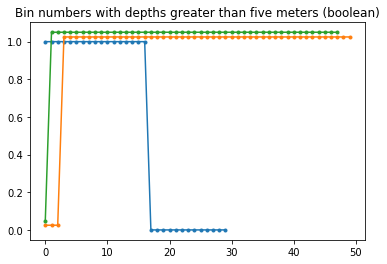

In [56]:

depOver5m=[]
depOver5m.append(matchingBinDep[0][:,1]>5)
depOver5m.append(matchingBinDep[1][:,1]>5)
depOver5m.append(matchingBinDep[2][:,1]>5)

for i in range(0,len(depOver5m)):
    plt.plot(depOver5m[i]+.025*i,'.-')
    
plt.title('Bin numbers with depths greater than five meters (boolean)')

[Text(0,0,'In-Shelf'), Text(0,0,'Shelf-Out'), Text(0,0,'Out-In')]

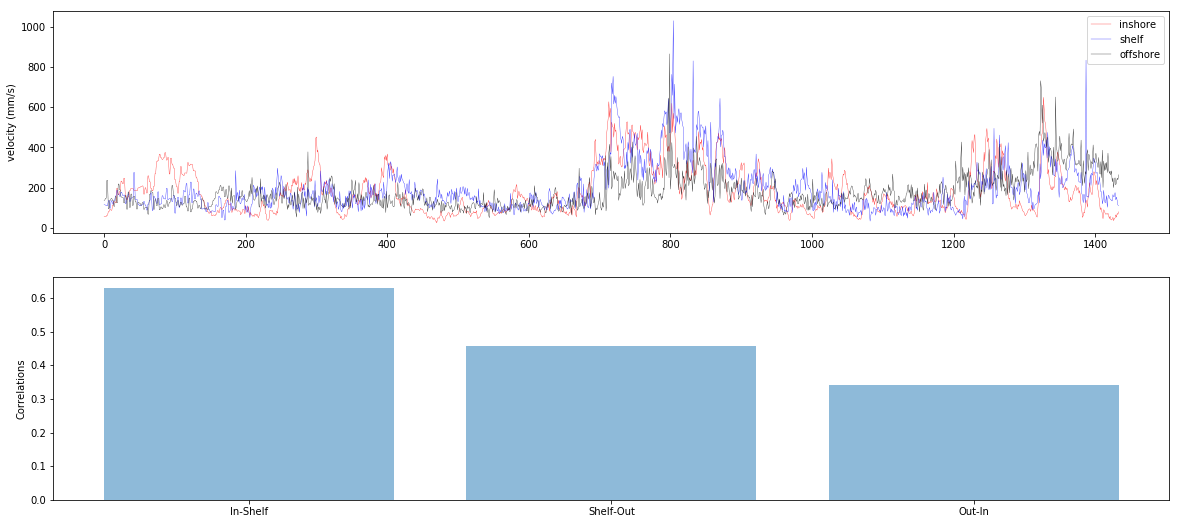

In [58]:
#so how closely do the velocity records of the three ADCPs correlate?
p=[]
axes=[]

plt.close()
fig, axes = plt.subplots(2, sharex=False)
fig.set_size_inches(20, 9)

correls=[]
InstrIn = np.nanmean((matchingEast[0][depOver5m[0],:]**2+matchingNorth[0][depOver5m[0],:]**2)**.5,0)
InstrShelf = np.nanmean((matchingEast[1][depOver5m[1],:]**2+matchingNorth[1][depOver5m[1],:]**2)**.5,0)
InstrOff = np.nanmean((matchingEast[2][depOver5m[2],:]**2+matchingNorth[2][depOver5m[2],:]**2)**.5,0)
correls.append(stats.pearsonr(InstrIn,InstrShelf))
correls.append(stats.pearsonr(InstrShelf,InstrOff))
correls.append(stats.pearsonr(InstrOff,InstrIn))

axes[0].plot(InstrIn,markers[0],linewidth=0.3,markersize=0.7,label=labels[0])
axes[0].plot(InstrShelf,markers[1],linewidth=0.3,markersize=0.7,label=labels[1])
axes[0].plot(InstrOff,markers[2],linewidth=0.3,markersize=0.7,label=labels[2])
axes[0].set_ylabel('velocity (mm/s)')
axes[0].legend()

axes[1].bar(np.arange(0,3),(correls[0][0],correls[1][0],correls[2][0]), align='center', alpha=0.5)
axes[1].set_xticks(np.arange(0,3))
plt.ylabel('Correlations')
axes[1].set_xticklabels(('In-Shelf','Shelf-Out','Out-In'))
# plt.title('Programming language usage')

**So the currents between:**
* The on-shelf to shelf-break stations are highly correlated (~0.65)
* The shelf-break to offshore stations are moderately correlated (~0.45)
* The on-shelf to offshore stations are least well correlated (~.35)

This matches with the line plots seen above.

**So,**
* The data looks of high quality
* The telemetered data matches very well with the downloaded data (noerrors introduced into their values anywhere in the system)
* The similarities between the three station suggest the sensors are working correctlye
* The differences between the three stations are indicative of the differences one would expect
* the data is relatively easy to work with